# Credit Risk Analysis Project

## Project Summary

This project aims to analyze and predict credit risk using a dataset of customer credit information. The workflow includes data loading, exploration, preprocessing, model building, evaluation, and prediction. Various machine learning techniques such as Decision Tree, AdaBoost, and weighted models are employed to improve prediction accuracy and handle imbalanced data. The project also includes generating random inputs for testing and translating numerical predictions into readable text.

In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading and Exploring Data
credit = pd.read_csv('data/credit.csv')
print(credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [3]:
# Checking 2 customer attributes
print(credit['checking_balance'].value_counts())
print(credit['savings_balance'].value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64


In [4]:
# Exploring the data for relevant columns
print(credit['months_loan_duration'].describe())
print(credit['amount'].describe())


count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: months_loan_duration, dtype: float64
count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: amount, dtype: float64


In [5]:
# Target variable (default)
print(credit['default'].value_counts())


no     700
yes    300
Name: default, dtype: int64


In [6]:
# Identifying categorical columns and converting them to numeric
categorical_columns = credit.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_columns}')

Categorical columns: Index(['checking_balance', 'credit_history', 'purpose', 'savings_balance',
       'employment_duration', 'other_credit', 'housing', 'job', 'phone',
       'default'],
      dtype='object')


In [7]:
# Using LabelEncoder to convert categorical columns to numeric
labelencoder = LabelEncoder()


In [8]:
# Creating a copy of the dataframe for manipulation
credit_encoded = credit.copy()

In [9]:
# Applying LabelEncoder to all categorical columns
for col in categorical_columns:
    credit_encoded[col] = labelencoder.fit_transform(credit_encoded[col])


In [10]:
# Checking the first rows to confirm encoding
print(credit_encoded.head())


   checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 1                     6               0        4    1169   
1                 0                    48               1        4    5951   
2                 3                    12               0        3    2096   
3                 1                    42               1        4    7882   
4                 1                    24               3        1    4870   

   savings_balance  employment_duration  percent_of_income  \
0                4                    3                  4   
1                2                    0                  2   
2                2                    1                  2   
3                2                    1                  2   
4                2                    0                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   4   67             1        1                     2    1  

In [11]:
# Splitting data into train and test sets
X = credit_encoded.drop(columns=['default'])
y = credit_encoded['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Checking the target variable distribution in train and test sets
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.698889
1    0.301111
Name: default, dtype: float64
0    0.71
1    0.29
Name: default, dtype: float64


In [12]:
# Building the decision tree model
clf = DecisionTreeClassifier(random_state=42)


In [13]:
# Training the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

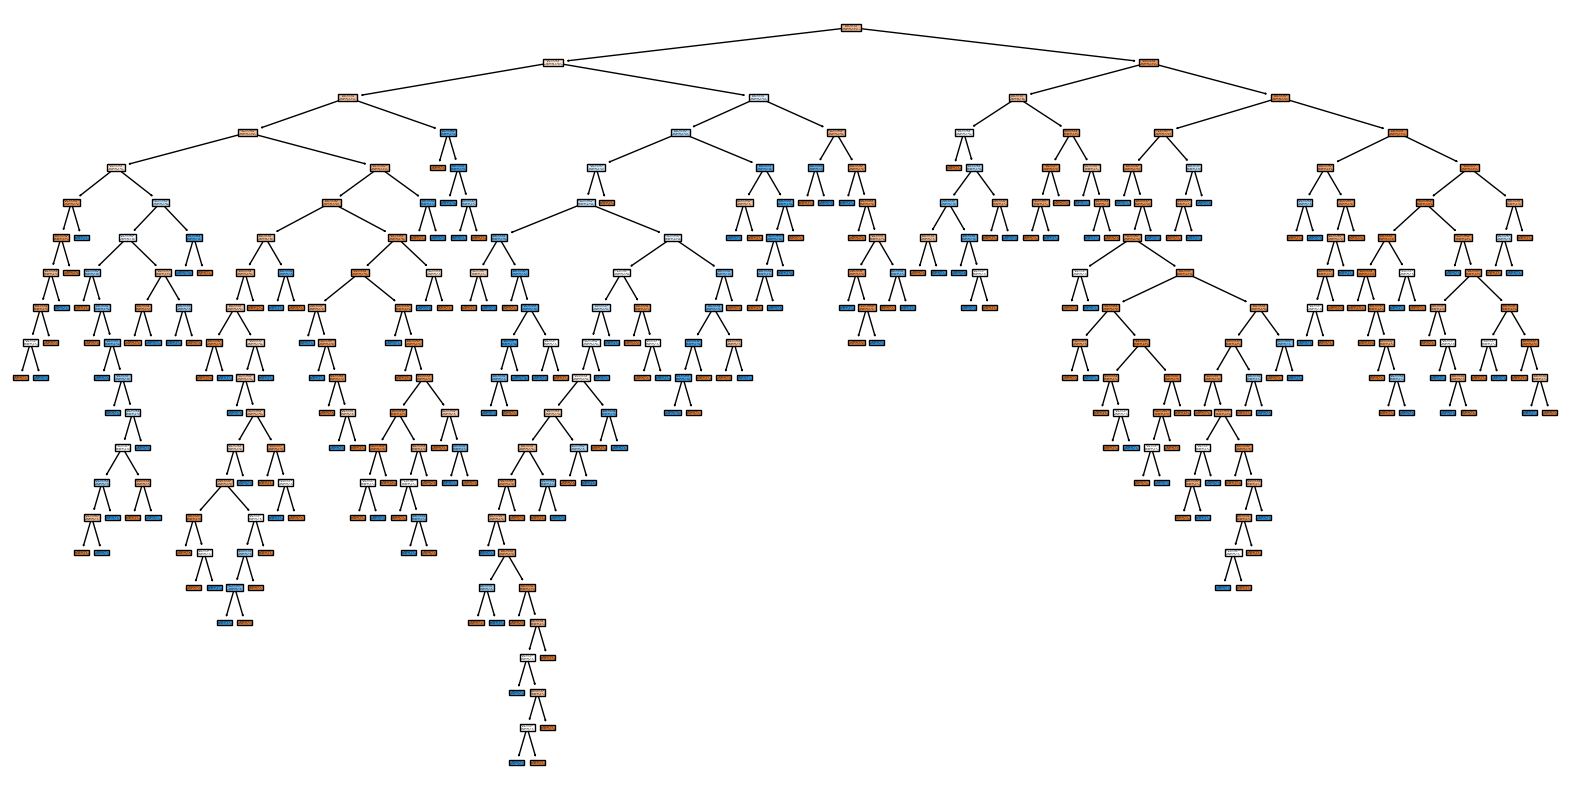

In [14]:
# Plotting the tree structure
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True)
plt.show()


In [15]:
# Evaluating the model performance
y_pred = clf.predict(X_test)

In [16]:
# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[56 15]
 [13 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        71
           1       0.52      0.55      0.53        29

    accuracy                           0.72       100
   macro avg       0.66      0.67      0.67       100
weighted avg       0.73      0.72      0.72       100



In [17]:
# Improving model performance with boosting (more iterations)
from sklearn.ensemble import AdaBoostClassifier

# UUsing AdaBoost to improve performance with 10 iterations
boost_model = AdaBoostClassifier(base_estimator=clf, n_estimators=30, random_state=42)
boost_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   n_estimators=30, random_state=42)

In [18]:
# Boosting model prediction
boost_pred = boost_model.predict(X_test)

In [19]:
# Confusion matrix and classification report for boosted model
print("Confusion Matrix – Boosted Model:")
print(confusion_matrix(y_test, boost_pred))
print("Classification Report – Boosted Model:")
print(classification_report(y_test, boost_pred))


Confusion Matrix – Boosted Model:
[[55 16]
 [11 18]]
Classification Report – Boosted Model:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        71
           1       0.53      0.62      0.57        29

    accuracy                           0.73       100
   macro avg       0.68      0.70      0.69       100
weighted avg       0.75      0.73      0.74       100



In [20]:
# Weighting errors – Cost Matrix

class_weights = {0: 1, 1: 4}  # Giving more weight to false negatives
weighted_model = DecisionTreeClassifier(class_weight=class_weights, random_state=42)


In [21]:
# Training the weighted model
weighted_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [22]:
# Predicting with weighted model
weighted_pred = weighted_model.predict(X_test)


In [23]:
# Confusion matrix and classification report for weighted model
print("Confusion Matrix – Weighted Model:")
print(confusion_matrix(y_test, weighted_pred))
print("Classification Report – Weighted Model:")
print(classification_report(y_test, weighted_pred))

Confusion Matrix – Weighted Model:
[[59 12]
 [ 8 21]]
Classification Report – Weighted Model:
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        71
           1       0.64      0.72      0.68        29

    accuracy                           0.80       100
   macro avg       0.76      0.78      0.77       100
weighted avg       0.81      0.80      0.80       100



In [24]:
# Testing the model with a specific entry (with feature names)
entry_test = X_test.iloc[[0]]  # Keeping DataFrame format with column names
print(f'Test Entry:\n{entry_test}')

Test Entry:
     checking_balance  months_loan_duration  credit_history  purpose  amount  \
521                 1                    18               1        4    3190   

     savings_balance  employment_duration  percent_of_income  \
521                2                    0                  2   

     years_at_residence  age  other_credit  housing  existing_loans_count  \
521                   2   24             1        1                     1   

     job  dependents  phone  
521    1           1      0  


In [25]:
# Predicting with the simple decision tree model
simple_pred = clf.predict(entry_test)
print(f'Prediction (Simple Model): {simple_pred}')

Prediction (Simple Model): [0]


In [26]:
# Predicting with the Boosted model
boosted_pred = boost_model.predict(entry_test)
print(f'Prediction (Boosted Model): {boosted_pred}')

Prediction (Boosted Model): [0]


In [27]:
# Predicting with the weighted model
weighted_pred_single = weighted_model.predict(entry_test)
print(f'Prediction (Weighted Model): {weighted_pred_single}')

Prediction (Weighted Model): [1]


Generating Random Input for Testing


In [28]:
# Generating a random input based on the original column values
def generate_random_input():
    input_data = {
        'checking_balance': np.random.choice(['< 0 DM', '1 - 200 DM', '> 200 DM', 'unknown']),
        'months_loan_duration': np.random.randint(6, 72),
        'credit_history': np.random.choice(['critical', 'good', 'poor', 'very good', 'perfect']),
        'purpose': np.random.choice(['car', 'education', 'furniture/appliances', 'business', 'domestic appliances']),
        'amount': np.random.randint(500, 20000),
        'savings_balance': np.random.choice(['< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM', 'unknown']),
        'employment_duration': np.random.choice(['< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years', 'unemployed']),
        'percent_of_income': np.random.randint(1, 5),
        'years_at_residence': np.random.randint(1, 5),
        'age': np.random.randint(18, 75),
        'other_credit': np.random.choice(['none', 'bank', 'store']),
        'housing': np.random.choice(['own', 'rent', 'other']),
        'existing_loans_count': np.random.randint(1, 4),
        'job': np.random.choice(['unskilled', 'skilled', 'management', 'self-employed']),
        'dependents': np.random.randint(1, 3),
        'phone': np.random.choice(['yes', 'no']),
    }
    return input_data

In [29]:
# Function to convert numerical predictions into readable text
def translate_prediction(prediction):
    if prediction == 0:
        return "Non-Defaulter"
    elif prediction == 1:
        return "Defaulter"
    else:
        return "Unknown value"

In [30]:
# Function to calculate and display the model accuracy
def show_accuracy(model, X_test, y_test, model_name):
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    print(f'Accuracy of {model_name}: {accuracy:.2f}')

In [31]:
# Generate a new random entry
new_entry = generate_random_input()

In [32]:
# Convert the entry to a DataFrame (necessary to keep the column names)
new_entry_df = pd.DataFrame([new_entry])


In [33]:
# View the generated new entry
print(new_entry_df)

  checking_balance  months_loan_duration credit_history    purpose  amount  \
0         > 200 DM                     9      very good  education    8469   

  savings_balance employment_duration  percent_of_income  years_at_residence  \
0       > 1000 DM            < 1 year                  3                   2   

   age other_credit housing  existing_loans_count        job  dependents phone  
0   42         none    rent                     3  unskilled           1    no  


In [34]:
# Encode the categorical variables using the same LabelEncoder we used earlier
categorical_columns = ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 
                       'employment_duration', 'other_credit', 'housing', 'job', 'phone']


In [35]:
# Applying LabelEncoder to the categorical columns of the new entry
for col in categorical_columns:
    new_entry_df[col] = labelencoder.fit_transform(new_entry_df[col])


In [36]:
# View the generated and encoded new entry
print(new_entry_df)

   checking_balance  months_loan_duration  credit_history  purpose  amount  \
0                 0                     9               0        0    8469   

   savings_balance  employment_duration  percent_of_income  \
0                0                    0                  3   

   years_at_residence  age  other_credit  housing  existing_loans_count  job  \
0                   2   42             0        0                     3    0   

   dependents  phone  
0           1      0  


In [37]:
# Make a prediction with the simple model and display accuracy
prediction_new_entry = clf.predict(new_entry_df)
print(f'Prediction for new entry (simple model): {translate_prediction(prediction_new_entry[0])}')
show_accuracy(clf, X_test, y_test, "Simple model")

# Prediction with the Boosting model and display accuracy
boost_prediction_new_entry = boost_model.predict(new_entry_df)
print(f'Prediction for new entry (Boosting model): {translate_prediction(boost_prediction_new_entry[0])}')
show_accuracy(boost_model, X_test, y_test, "Boosting model")

# Prediction with the weighted model and display accuracy
weighted_prediction_new_entry = weighted_model.predict(new_entry_df)
print(f'Prediction for new entry (weighted model): {translate_prediction(weighted_prediction_new_entry[0])}')
show_accuracy(weighted_model, X_test, y_test, "Weighted model")

Prediction for new entry (simple model): Non-Defaulter
Accuracy of Simple model: 0.72
Prediction for new entry (Boosting model): Non-Defaulter
Accuracy of Boosting model: 0.73
Prediction for new entry (weighted model): Non-Defaulter
Accuracy of Weighted model: 0.80
